In [1]:
from mitgcmdata import MITgcmmodel
reload(MITgcmmodel)
from mitgcmdata import layers
import MITgcmutils.mds as mds
import numpy as np
import xray
import xgcm

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['image.origin'] = 'bottom'
plt.rcParams['figure.figsize'] = (14,8)

In [4]:
345600 * 900 / (24*60*60)

3600

In [3]:
N = 40
iter0 = 0
diters = 72
iters = range(iter0, iter0+diters*N+1, diters)
ddir = '/home/rpa/MITgcm/verification/vermix/run'
ds = xgcm.open_mdsdataset(ddir, iters, deltaT=1200)


/home/rpa/xgcm/xgcm/mdsxray.py:243: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/rpa/xgcm/xgcm/mdsxray.py:243: UserWarning: Not sure what to do with rlev = X
  warnings.warn("Not sure what to do with rlev = " + rlev)


ValueError: dimensions ('Y', 'X') must have the same length as the number of data dimensions, ndim=1

In [2]:
import helper
reload(helper)

ddir = '/home/rpa/MITgcm/verification/vermix/run'

N = 40

layers_name = '1RHO'
deltaTclock = 1200.
day = 24*60*60.

time = np.array(iters, 'f8') * deltaTclock / day

In [3]:
m = MITgcmmodel.ModelInstance(ddir, default_iter=iters[1:])

  1   1  26


In [42]:
UVWTS = m.rdmds('DiagUVWTS')
prho = m.rdmds('PRHO')

In [69]:
ld = m.rdmds('DiagLAYERS-diapycnal')
ld_labels = ['LaTs1RHO', 'LaTh1RHO', 'LaTz1RHO',
             'LTha1RHO', 'LTza1RHO', 'LaSs1RHO',
             'LaSh1RHO', 'LaSz1RHO', 'LSha1RHO',
             'LSza1RHO', 'LTto1RHO', 'LSto1RHO']

lt = m.rdmds('DiagLAYERS-trend', iters[:-1])
lt_labels = ['LaHs1RHO', 'LaHw1RHO', 'LaHc1RHO']

lb = mds.rdmds(m.output_dir + '/layers1RHO')

In [44]:
ld = m.rdmds('DiagLAYERS-TH-diapycnal')
ld_labels = ['LaTs2TH ','LaTh2TH ','LaTz2TH ',
             'LTha2TH ','LTza2TH ','LTto2TH ']

lt = m.rdmds('DiagLAYERS-TH-trend', iters[:-1])
lt_labels = ['LaHs1RHO', 'LaHw1RHO', 'LaHc1RHO']

lb = mds.rdmds(m.output_dir + '/layers2TH')

<matplotlib.colorbar.Colorbar instance at 0x7f84c553f5f0>

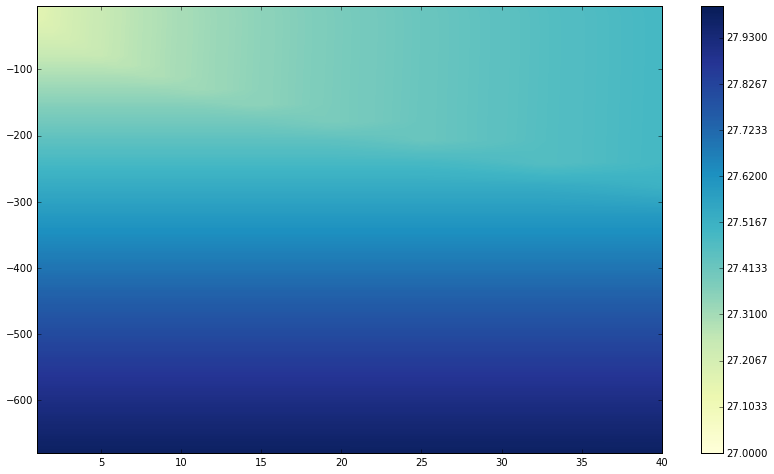

In [70]:

plt.contourf(time[1:], m.rc.squeeze(), prho.squeeze().T, lb.squeeze(), cmap='YlGnBu')
#plt.contourf(time[1:], m.rc.squeeze(), UVWTS[:,3].squeeze().T, lb.squeeze(), cmap='YlGnBu')
plt.colorbar()


In [71]:
# calculate thickness tendency term
nlt = 2 # which location to use (s, w, c)
dhcdt = np.diff(lt[:,nlt], axis=0) / (diters * deltaTclock)
dhcdt.shape

(39, 300, 1, 1)

<matplotlib.colorbar.Colorbar instance at 0x7f84c52c6d88>

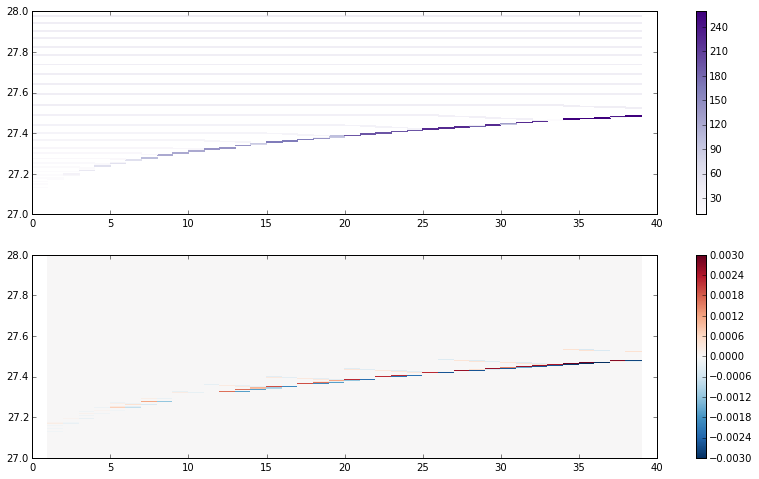

In [72]:
plt.subplot(211)
plt.pcolormesh(time[:-1], lb.squeeze(), np.ma.masked_equal(lt[:,nlt].squeeze().T, 0.), cmap='Purples')
#plt.ylim([28,27])
plt.colorbar()

plt.subplot(212)
plt.pcolormesh(time[1:-1], lb.squeeze(), dhcdt.squeeze().T, cmap='RdBu_r')
#plt.ylim([28,27])
plt.colorbar()



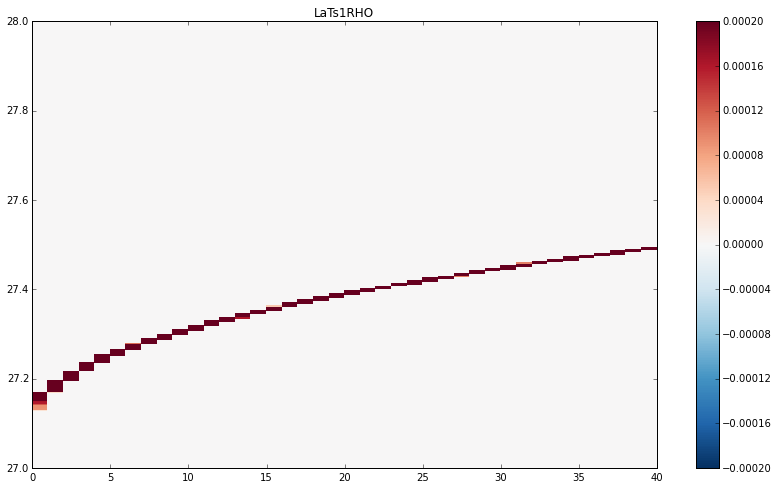

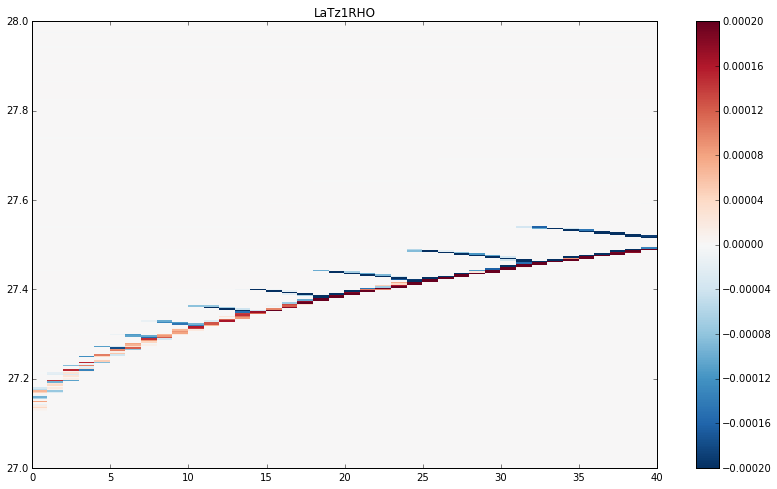

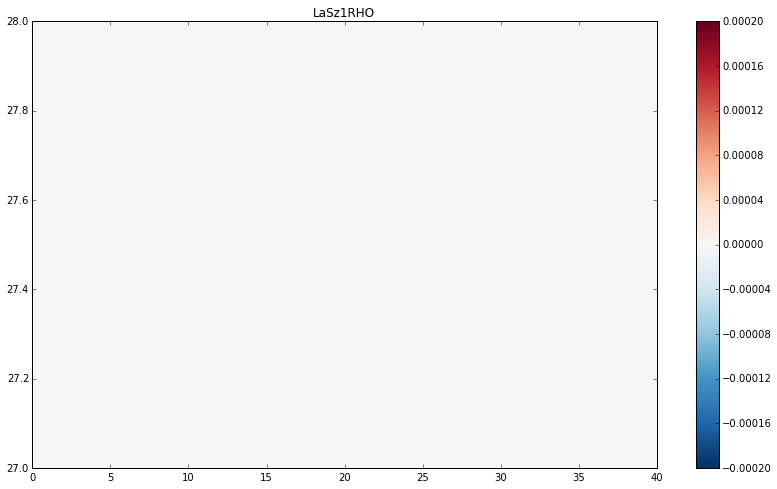

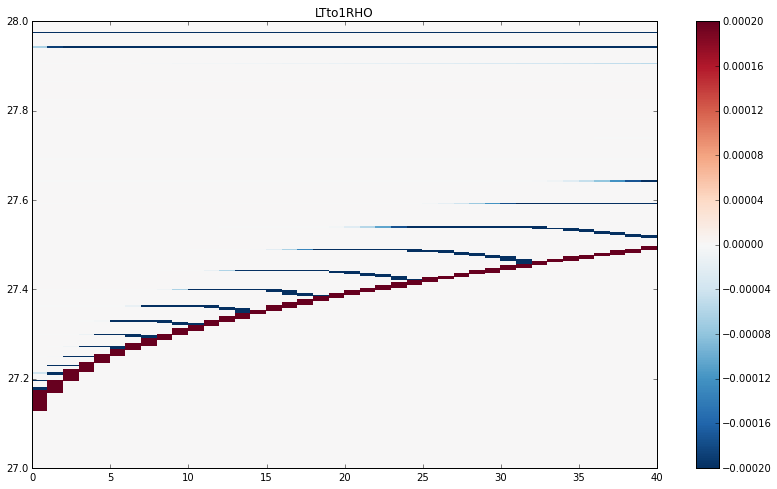

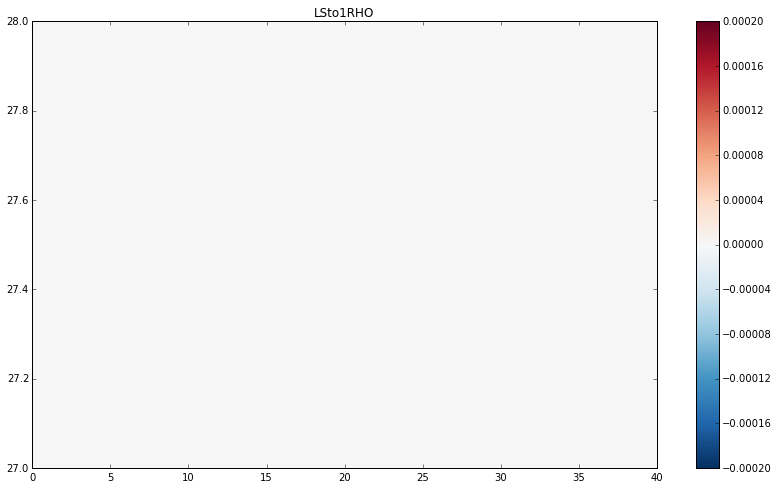

In [73]:

lbw = 0.5*(lb[1:] + lb[:-1])

for n in range(len(ld_labels)):
    fld = ld[:,n].squeeze().T
    if not fld.sum()==0.:
        plt.figure()
        plt.pcolormesh(time, lbw.squeeze(), fld, cmap='RdBu_r')
        plt.clim([-2e-4, 2e-4])
        plt.colorbar()
        #plt.ylim([28,27])
        plt.title(ld_labels[n])


In [74]:
ld_net = ld[:,0] + ld[:,2]
ld_tot = ld[:,-2]
#ld_tot = ld[:,-1]

drho = np.diff(lb,axis=0)
dhcdt_diapycnal = -np.diff(ld_tot/day, axis=1) #/ drho[0]

In [75]:
ld.sum()

12932.599074131991

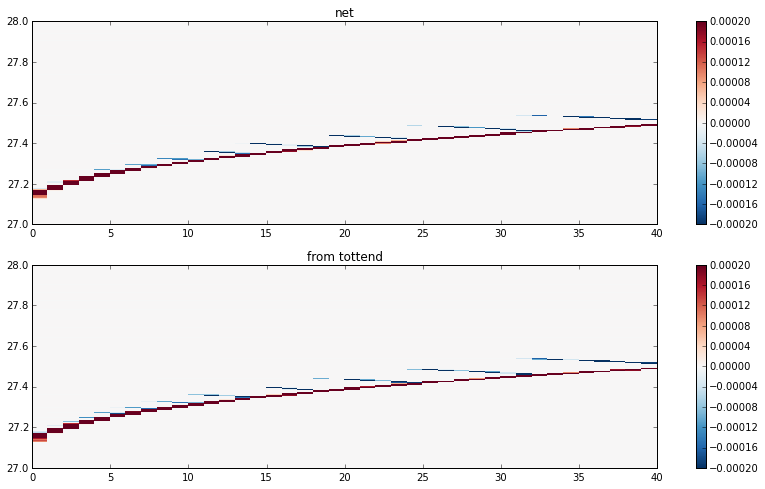

In [76]:
plt.subplot(211)
plt.pcolormesh(time, lbw.squeeze(), ld_net.squeeze().T, cmap='RdBu_r')
plt.clim([-2e-4, 2e-4])
plt.colorbar()
#plt.ylim([28,27])
plt.title('net')

plt.subplot(212)
plt.pcolormesh(time, lbw.squeeze(), ld_tot.squeeze().T/day, cmap='RdBu_r')
plt.clim([-2e-4, 2e-4])
plt.colorbar()
#plt.ylim([28,27])
plt.title('from tottend')



<matplotlib.colorbar.Colorbar instance at 0x7f84c5d33248>

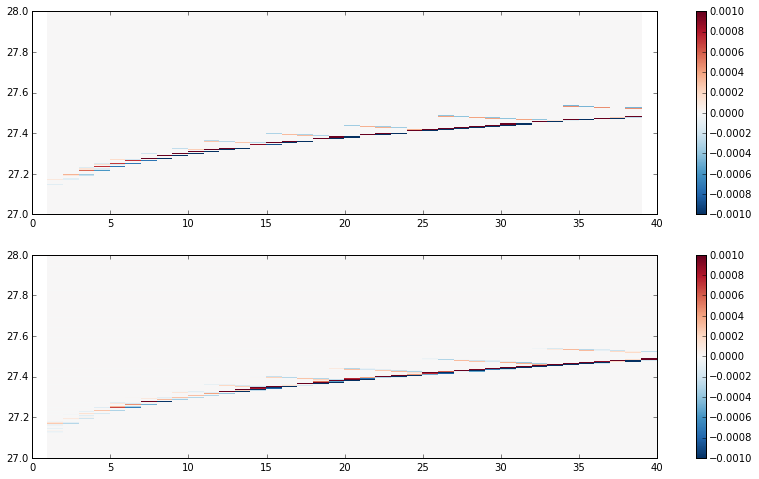

In [82]:
plt.subplot(211)
plt.pcolormesh(time[1:-1], lb.squeeze(), dhcdt.squeeze().T, cmap='RdBu_r')
#plt.ylim([28,27])
plt.clim([-1e-3,1e-3])
plt.colorbar()

plt.subplot(212)
plt.pcolormesh(time[1:], lb.squeeze()[1:-1], dhcdt_diapycnal.squeeze().T, cmap='RdBu_r')
#plt.ylim([28,27])
plt.xlim([0,40])
plt.clim([-1e-3,1e-3])
plt.colorbar()


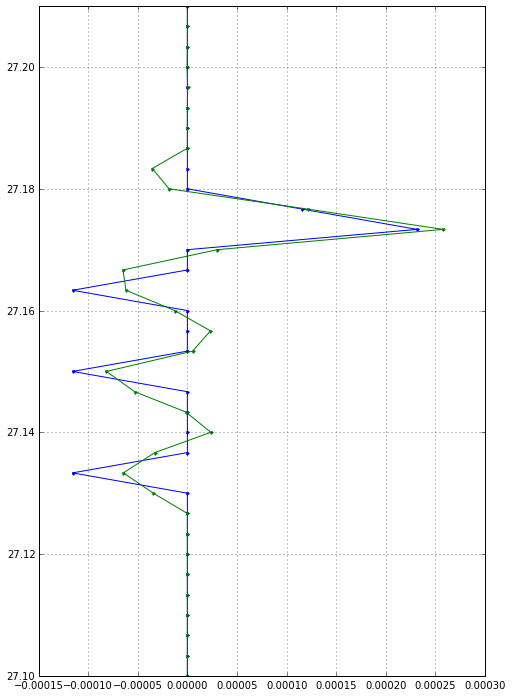

In [88]:
plt.figure(figsize=(8,12))
plt.plot(dhcdt.squeeze()[:1].mean(axis=0), lb[1:].squeeze(), '.-')
plt.plot(dhcdt_diapycnal.squeeze()[:1].mean(axis=0), lb.squeeze()[2:-1], '.-')
plt.ylim([27.1,27.21])
plt.grid()

In [36]:
print dhcdt_diapycnal.squeeze().mean(axis=0).sum()
print dhcdt.squeeze().mean(axis=0).sum()

2.51545616602e-07
5.66046016483e-13


# things to vary #

* num_layers
* finegridfac
* output frequency


In [167]:
diters*deltaTclock

86400.0

In [168]:
# to check: is this a problem with alpha / beta ?

In [173]:
T = m.rdmds('T',0)

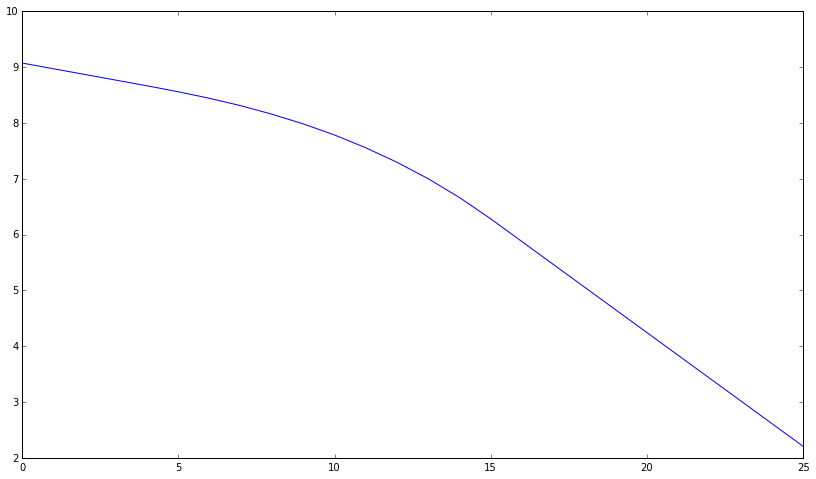

In [175]:
plt.plot(T.squeeze())

In [40]:
Tbounds = np.linspace(2,10,301)
Tbounds

array([  2.        ,   2.02666667,   2.05333333,   2.08      ,
         2.10666667,   2.13333333,   2.16      ,   2.18666667,
         2.21333333,   2.24      ,   2.26666667,   2.29333333,
         2.32      ,   2.34666667,   2.37333333,   2.4       ,
         2.42666667,   2.45333333,   2.48      ,   2.50666667,
         2.53333333,   2.56      ,   2.58666667,   2.61333333,
         2.64      ,   2.66666667,   2.69333333,   2.72      ,
         2.74666667,   2.77333333,   2.8       ,   2.82666667,
         2.85333333,   2.88      ,   2.90666667,   2.93333333,
         2.96      ,   2.98666667,   3.01333333,   3.04      ,
         3.06666667,   3.09333333,   3.12      ,   3.14666667,
         3.17333333,   3.2       ,   3.22666667,   3.25333333,
         3.28      ,   3.30666667,   3.33333333,   3.36      ,
         3.38666667,   3.41333333,   3.44      ,   3.46666667,
         3.49333333,   3.52      ,   3.54666667,   3.57333333,
         3.6       ,   3.62666667,   3.65333333,   3.68

In [41]:
rhobounds = np.linspace(27,28,301)
rhobounds

array([ 27.        ,  27.00333333,  27.00666667,  27.01      ,
        27.01333333,  27.01666667,  27.02      ,  27.02333333,
        27.02666667,  27.03      ,  27.03333333,  27.03666667,
        27.04      ,  27.04333333,  27.04666667,  27.05      ,
        27.05333333,  27.05666667,  27.06      ,  27.06333333,
        27.06666667,  27.07      ,  27.07333333,  27.07666667,
        27.08      ,  27.08333333,  27.08666667,  27.09      ,
        27.09333333,  27.09666667,  27.1       ,  27.10333333,
        27.10666667,  27.11      ,  27.11333333,  27.11666667,
        27.12      ,  27.12333333,  27.12666667,  27.13      ,
        27.13333333,  27.13666667,  27.14      ,  27.14333333,
        27.14666667,  27.15      ,  27.15333333,  27.15666667,
        27.16      ,  27.16333333,  27.16666667,  27.17      ,
        27.17333333,  27.17666667,  27.18      ,  27.18333333,
        27.18666667,  27.19      ,  27.19333333,  27.19666667,
        27.2       ,  27.20333333,  27.20666667,  27.21